# Machine Learning 2 - Neural Networks

In this lab, we will use simple Neural Networks to classify the images from the simplified CIFAR-10 dataset. We will compare our results with those obtained with Decision Trees and Random Forests.

Lab objectives
----
* Classification with neural networks
* Influence of hidden layers and of the selected features on the classifier results

In [1]:
from lab_tools import CIFAR10

dataset = CIFAR10('../data/CIFAR10/CIFAR10/')

Pre-loading training data
Pre-loading test data


We will use the *[Multi-Layer Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)* implementation from scikit-learn, which is only available since version 0.18. You can check which version of scikit-learn is installed by executing this :

In [2]:
import sklearn
print(sklearn.__version__)

1.6.1


If you have version 0.17 or older, please update your scikit-learn installation (for instance, with the command *pip install scikit-learn==0.19.1* in the terminal or Anaconda prompt)

## Build a simple neural network

* Using the [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from scikit-learn, create a neural network with a single hidden layer.
* Train this network on the CIFAR dataset.
* Using cross-validation, try to find the best possible parameters.

In [3]:
# first train a simple MLP classifier
from sklearn.neural_network import MLPClassifier
from lab_tools import ML_pipeline
import matplotlib.pyplot as plt

mlp_clf = MLPClassifier(
    hidden_layer_sizes=(120,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='adaptive',
    batch_size='auto', #200 by default
    early_stopping=True)

ML_pipeline(mlp_clf, 
            dataset.train["hog"],
            dataset.train["labels"],
            dataset.test["hog"],
            dataset.test["labels"],
            False)



Descriptive Performance Metrics
Cross-validation is done only on the training set
Accuracy from cross-validation : [0.73766667 0.76       0.764      0.756      0.74733333]
Cross-validation mean accuracy :  0.753
Training set accuracy (cheating) :  0.7466666666666667
Confusion Matrix (on training set) :
 [[3904  714  382]
 [ 785 3273  942]
 [ 299  678 4023]]
Predictive Performance Metrics
Test set accuracy :  0.7376666666666667
Confusion Matrix (on test set) :
 [[778 165  57]
 [153 653 194]
 [ 64 154 782]]
Classification report :
               precision    recall  f1-score   support

           0      0.782     0.778     0.780      1000
           1      0.672     0.653     0.662      1000
           2      0.757     0.782     0.769      1000

    accuracy                          0.738      3000
   macro avg      0.737     0.738     0.737      3000
weighted avg      0.737     0.738     0.737      3000



(0.753,
 0.7376666666666667,
 array([[778, 165,  57],
        [153, 653, 194],
        [ 64, 154, 782]]))

The MLP implementation in scikit-learn uses the log loss function that is defined as follows:
$$
L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})
$$
where $N$ is the number of samples, $C$ is the number of classes, $y_{ij}$ is 1 if sample $i$ belongs to class $j$, and $\hat{y}_{ij}$ is the predicted probability that sample $i$ belongs to class $j$. The log loss function is a measure of how well the predicted probabilities match the true labels. A lower log loss indicates better performance.

Number of batches for the dataset:  75.0
Number of epochs:  22


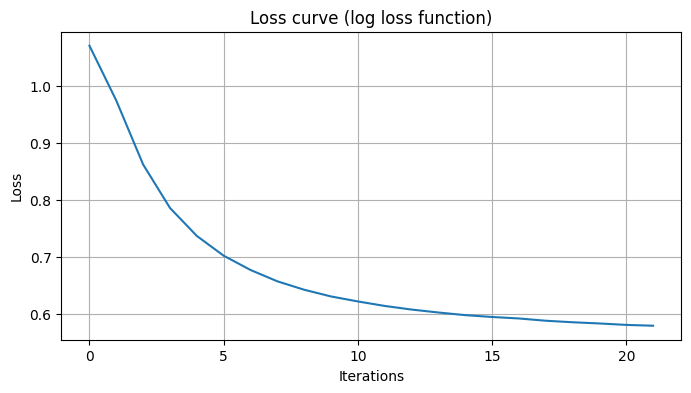

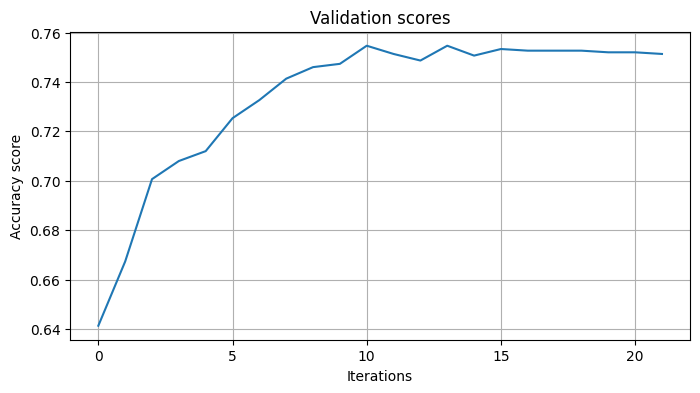

In [4]:
if mlp_clf.batch_size == 'auto':
    print("Number of batches for the dataset: ", len(dataset.train["hog"]) / 200)
    print("Number of epochs: ", mlp_clf.n_iter_)
else:
    print("Number of batches for the dataset: ", len(dataset.train["hog"]) / mlp_clf.batch_size)
    print("Number of epochs: ", mlp_clf.n_iter_)

# loss curve
loss_curve = mlp_clf.loss_curve_
plt.figure(figsize=(8, 4))
plt.plot(loss_curve)
plt.title('Loss curve (log loss function)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

# validation scores
validation_scores = mlp_clf.validation_scores_
plt.figure(figsize=(8, 4))
plt.plot(validation_scores)
plt.title('Validation scores')
plt.xlabel('Iterations')
plt.ylabel('Accuracy score')
plt.grid()
plt.show()

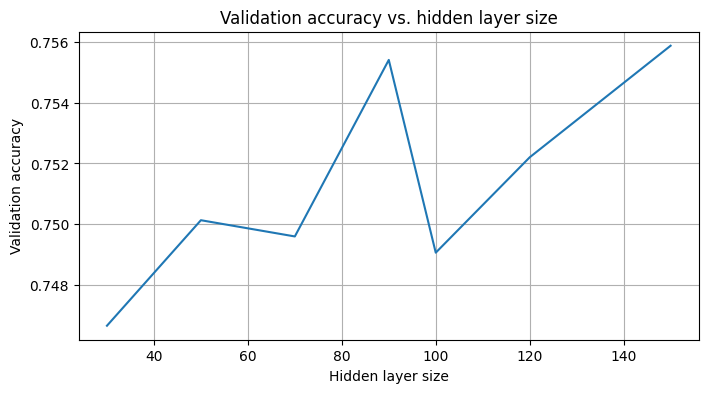

In [5]:
# try to find best parameters (still on single layer)
from lab_tools import evaluate_parameter

accuracys = evaluate_parameter(model_class=MLPClassifier,
                     param_name='hidden_layer_sizes',
                     param_range=[(30,),(50,),(70,),(90,),(100,),(120,),(150,)],
                     X_train=dataset.train["hog"],
                     y_train=dataset.train["labels"],
                     fixed_params={
                        'activation': 'relu',
                        'solver': 'adam',
                        'alpha': 0.0001,
                        'learning_rate': 'constant',
                        'batch_size': 'auto',
                        'early_stopping': True},
                     plot=False
                     )
plt.figure(figsize=(8, 4))
plt.plot([30,50,70,90,100,120,150], accuracys)
plt.title('Validation accuracy vs. hidden layer size')
plt.xlabel('Hidden layer size')
plt.ylabel('Validation accuracy')
plt.grid()
plt.show()

In [6]:
# find best parameters (on one layer)
from lab_tools import find_best_hyperparameters

best_params = find_best_hyperparameters(
    model=MLPClassifier(hidden_layer_sizes=(80,)),
    param_grid={
        'hidden_layer_sizes': [(80,),(100,),(120,)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001],
        'learning_rate': ['constant', 'adaptive'],
        'batch_size': ['auto'],
        'early_stopping': [True]},
    X_train=dataset.train["hog"],
    y_train=dataset.train["labels"],
)

Searching best parameters...
Best parameters:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'early_stopping': True, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score:  0.7597333333333334


## Add hidden layers to the network

Try to change the structure of the network by adding hidden layers. Using cross-validation, try to find the best architecture for your network.

In [7]:
# try more layers
mlp_layers_clf = MLPClassifier(hidden_layer_sizes=(128, 64),
                                activation='relu',
                                solver='adam',
                                alpha=0.0001,
                                learning_rate='adaptive',
                                batch_size='auto',
                                early_stopping=True)
ML_pipeline(mlp_layers_clf,
            dataset.train["hog"],
            dataset.train["labels"],
            dataset.test["hog"],
            dataset.test["labels"],
            False)

Descriptive Performance Metrics
Cross-validation is done only on the training set
Accuracy from cross-validation : [0.76533333 0.78466667 0.77733333 0.77966667 0.786     ]
Cross-validation mean accuracy :  0.7786
Training set accuracy (cheating) :  0.8188
Confusion Matrix (on training set) :
 [[4216  580  204]
 [ 695 3716  589]
 [ 150  500 4350]]
Predictive Performance Metrics
Test set accuracy :  0.7776666666666666
Confusion Matrix (on test set) :
 [[814 140  46]
 [148 695 157]
 [ 39 137 824]]
Classification report :
               precision    recall  f1-score   support

           0      0.813     0.814     0.814      1000
           1      0.715     0.695     0.705      1000
           2      0.802     0.824     0.813      1000

    accuracy                          0.778      3000
   macro avg      0.777     0.778     0.777      3000
weighted avg      0.777     0.778     0.777      3000



(0.7786,
 0.7776666666666666,
 array([[814, 140,  46],
        [148, 695, 157],
        [ 39, 137, 824]]))

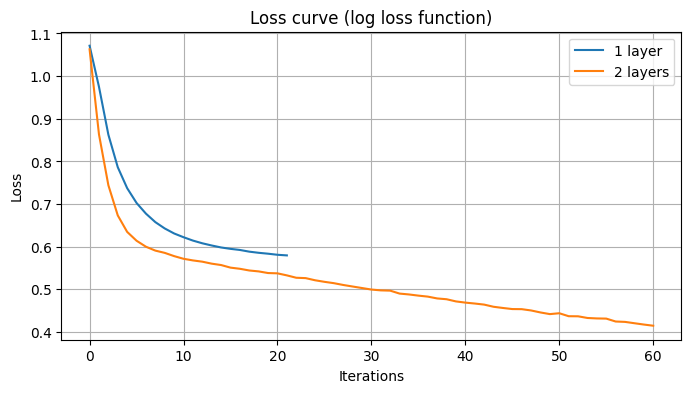

In [8]:
# loss curve
loss_curve_layer = mlp_layers_clf.loss_curve_
plt.figure(figsize=(8, 4))
plt.plot(loss_curve)
plt.plot(loss_curve_layer)
plt.legend(['1 layer', '2 layers'])
plt.title('Loss curve (log loss function)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [9]:
final_accuracys = []
cross_vals = []
loss_curves = []
for layer in [(128,), (128, 64), (128, 64, 32), (128, 64, 32, 16)]:
    mlp_layers_clf = MLPClassifier(hidden_layer_sizes=layer,
                                    activation='relu',
                                    solver='adam',
                                    alpha=0.0001,
                                    learning_rate='adaptive',
                                    batch_size='auto',
                                    early_stopping=True)
    cross_val, accuracy, cm = ML_pipeline(mlp_layers_clf,
                dataset.train["hog"],
                dataset.train["labels"],
                dataset.test["hog"],
                dataset.test["labels"],
                False)
    final_accuracys.append(accuracy)
    cross_vals.append(cross_val)
    loss_curves.append(mlp_layers_clf.loss_curve_)

Descriptive Performance Metrics
Cross-validation is done only on the training set
Accuracy from cross-validation : [0.74133333 0.76333333 0.765      0.73433333 0.76033333]
Cross-validation mean accuracy :  0.7528666666666666
Training set accuracy (cheating) :  0.8064
Confusion Matrix (on training set) :
 [[4071  646  283]
 [ 584 3729  687]
 [ 168  536 4296]]
Predictive Performance Metrics
Test set accuracy :  0.7783333333333333
Confusion Matrix (on test set) :
 [[803 141  56]
 [118 707 175]
 [ 35 140 825]]
Classification report :
               precision    recall  f1-score   support

           0      0.840     0.803     0.821      1000
           1      0.716     0.707     0.711      1000
           2      0.781     0.825     0.803      1000

    accuracy                          0.778      3000
   macro avg      0.779     0.778     0.778      3000
weighted avg      0.779     0.778     0.778      3000

Descriptive Performance Metrics
Cross-validation is done only on the training set


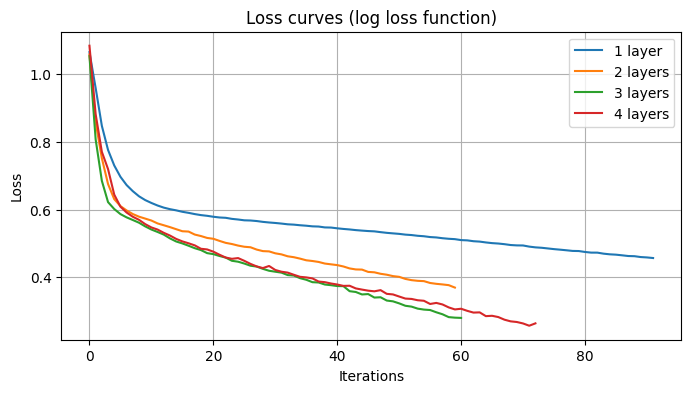

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(loss_curves[0])
plt.plot(loss_curves[1])
plt.plot(loss_curves[2])
plt.plot(loss_curves[3])
plt.legend(['1 layer', '2 layers','3 layers','4 layers'])
plt.title('Loss curves (log loss function)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

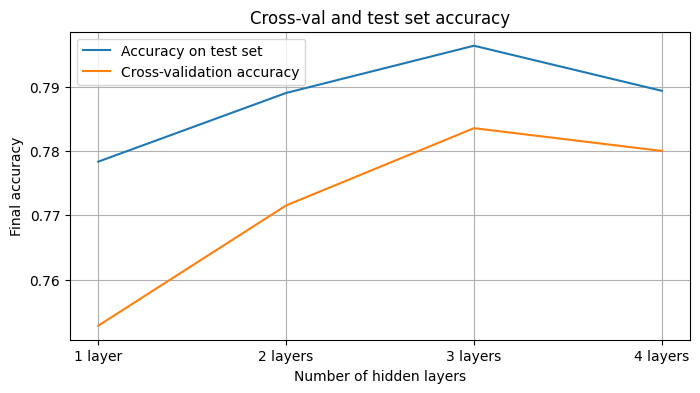

In [12]:
plt.figure(figsize=(8, 4))
plt.plot([1,2,3,4], final_accuracys)
plt.plot([1,2,3,4], cross_vals)
plt.title('Cross-val and test set accuracy')
plt.xlabel('Number of hidden layers')
plt.ylabel('Final accuracy')
plt.legend(['Accuracy on test set', 'Cross-validation accuracy'])
plt.grid()
plt.xticks([1,2,3,4], ['1 layer','2 layers', '3 layers', '4 layers'])
plt.show()

As conclusion, the difference between the 2 and 3 layers is only 1%, so negligeable.

The rule of thumb to choose the number of layers is (input size + output size)/2 $\approx$ 128. Then divide by 2 each following hidden layer to compress information and reduce the training time.